In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# №1
1) загрузите данные из файла https://cloud.mail.ru/public/oaop/3zJDbUsng (это
двумерная выборка, целевая переменная на которой принимает значения 1 или -1).

In [4]:
df = pd.read_csv('logistic.csv', header=None)

2) Как наблюдения распределились по классам? (сколько в каждом классе?). Для ответа
можно использовать метод value_counts().

In [6]:
classes = df[0].value_counts()
print(classes)

0
 1    105
-1    100
Name: count, dtype: int64


3) Отобразите точками на плоскости признаки, различая классы цветом. Уберите
данные, которые не попали в диапазон значений от -5 до 5 (будем считать их
выбросами).

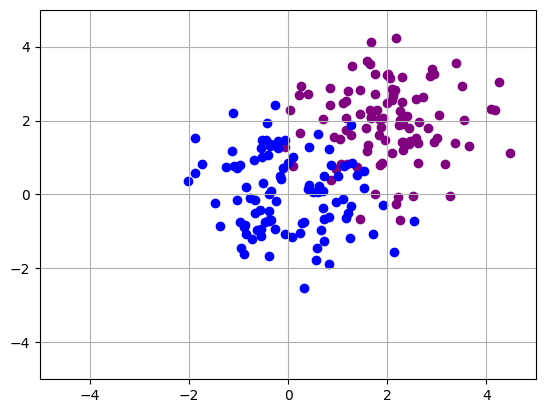

In [28]:
df_filtered = df[((df[1] >= -5) & (df[1] <= 5)) & ((df[2] >= -5) & (df[2] <= 5))]

class_1 = df_filtered[df_filtered[0] == 1]
class_minus_1 = df_filtered[df_filtered[0] == -1]

plt.scatter(class_1[1], class_1[2], color='purple', marker='o')
plt.scatter(class_minus_1[1], class_minus_1[2], color='blue', marker='o')
plt.grid(True)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

4) Разделите данные на признаки и ответы.

In [15]:
x = df_filtered.iloc[:, 1:]
y = df_filtered.iloc[:, 0]

5) Обучите модель логистической регрессии (LogisticRegression или
LogisticRegression_CV, дайте описание гиперпараметров модели). Для обучения
используйте всю выборку.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

 6) Отобразите на ранее полученном рисунке гиперплоскость, получив необходимые коэффициенты из построенной модели.

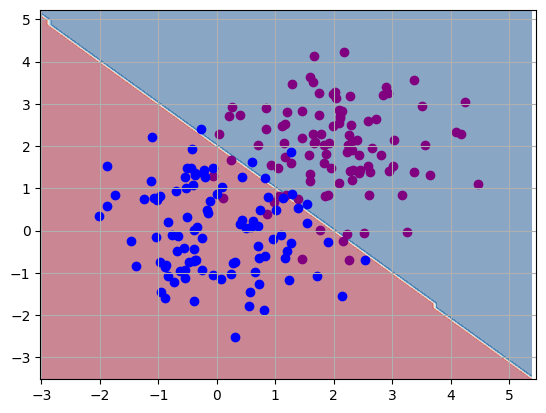

In [30]:
w1, w2 = model.coef_[0]
b = model.intercept_[0]

x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1
y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

class_1 = df_filtered[df_filtered[0] == 1]
class_minus_1 = df_filtered[df_filtered[0] == -1]

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.5)
plt.scatter(class_1[1], class_1[2], color='purple', marker='o')
plt.scatter(class_minus_1[1], class_minus_1[2], color='blue', marker='o')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid(True)
plt.show()

7)  Получите матрицу ошибок (confusion matrix). Дайте пояснения.

In [31]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  2]
 [ 4 28]]


26 наблюдений первого класса классифицированы правильно

2 наблюдения первого класса классифицированы не правильно

4 наблюдения второго класса классифицированы неправильно

28 наблюдений второго класса классифицированы правильно

8) Получите оценки качества классификации (на обучающей выборке): доля
правильных ответов, точность, полнота, F-меру, AUC. Дайте пояснения.

In [32]:
y_train_pred = model.predict(x_train)

accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

y_train_proba = model.predict_proba(x_train)[:, 1]
auc = roc_auc_score(y_train, y_train_proba)

print(f"Доля правильных ответов: {accuracy:.4f}")
print(f"Точность: {precision:.4f}")
print(f"Полнота: {recall:.4f}")
print(f"F-мера: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Доля правильных ответов: 0.9286
Точность: 0.9394
Полнота: 0.9118
F-мера: 0.9254
AUC: 0.9871


Вероятность того, что класс будет предсказан правильно: 92.9%

Доля правильных ответов модели в пределах класса: 93.9%

Доля истинно положительных классификаций: 91.2%

Среднее гармоническое точности и полноты: 92.5%

Способность модели различать классы: 98.7%

9) В окрестности гиперплоскости задайте некоторое количество случайных точек
(отобразите их на рисунке новым цветом). Определите при помощи построенной
модели принадлежность классу.


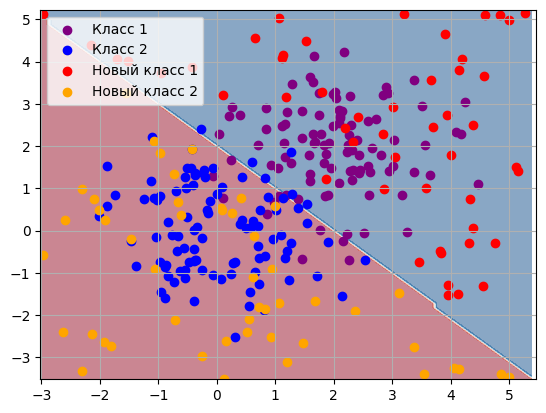

In [37]:
random_points_count = 100
random_points = []
random_points_classes = []
for i in range(random_points_count):
    point_x = np.random.uniform(x_min, x_max)
    point_y = np.random.uniform(y_min, y_max)

    random_points.append([point_x, point_y])
    predicted_class = model.predict([[point_x, point_y]])[0]
    random_points_classes.append(predicted_class)

random_points = np.array(random_points)
random_points_class_1 = random_points[np.array(random_points_classes) == 1]
random_points_class_minus_1 = random_points[np.array(random_points_classes) == -1]

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.5)
plt.scatter(class_1[1], class_1[2], color='purple', label='Класс 1')
plt.scatter(class_minus_1[1], class_minus_1[2], color='blue', label='Класс 2')
plt.scatter(random_points_class_1[:, 0], random_points_class_1[:, 1], color='red', label='Новый класс 1')
plt.scatter(random_points_class_minus_1[:, 0], random_points_class_minus_1[:, 1], color='orange', label='Новый класс 2')
plt.legend()
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid(True)
plt.show()

# 2

1) Загрузите датасет iris (sklearn.datasets.load_iris).

In [129]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

2) Дайте описание каждого признака и целевой переменной

In [130]:
iris_df['target'] = iris.target
print("sepal length (cm): Длина чашелистика в сантиметрах.")
print("sepal width (cm): Ширина чашелистика в сантиметрах.")
print("petal length (cm): Длина лепестка в сантиметрах.")
print("petal width (cm): Ширина лепестка в сантиметрах.")
print("Целевая перменная:", iris['target_names'])

sepal length (cm): Длина чашелистика в сантиметрах.
sepal width (cm): Ширина чашелистика в сантиметрах.
petal length (cm): Длина лепестка в сантиметрах.
petal width (cm): Ширина лепестка в сантиметрах.
Целевая перменная: ['setosa' 'versicolor' 'virginica']


3) Как наблюдения распределились по классам? (сколько в каждом классе?). Для
ответа используйте метод value_counts().

In [131]:
class_counts = iris_df['target'].value_counts()
print(class_counts)

target
0    50
1    50
2    50
Name: count, dtype: int64


4) Разделите данные на признаки и ответы, а затем на обучающую и тестовую выборки.

In [132]:
X = iris_df.drop('target', axis=1)
y = iris_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5) Обучите модель логистической регрессии (LogisticRegression или LogisticRegression_CV, дайте описание гиперпараметров модели).

In [133]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)

print("Коэффициенты модели:", model.coef_)
print("Свободный член:", model.intercept_)

Коэффициенты модели: [[-0.77929311  1.3519912  -1.59627349 -1.42737302]
 [ 0.25113137 -1.26696209  0.55078399 -0.73931909]
 [ 0.0180311  -0.20827858  1.73529514  2.39229869]]
Свободный член: [-1.47992812 -0.84440154 -2.54239507]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


6) С помощью метода predict_proba получите вероятности принадлежности классам
объектов тестовой выборки (вывод оформите в два столбца: значение вероятности,
верный ответ).

In [134]:
probabilities = model.predict_proba(X_test)

results_df = pd.DataFrame()
num_classes = probabilities.shape[1]
for i in range(num_classes):
    results_df[f'Probability_Class_{i}'] = probabilities[:, i]

results_df['True_Label'] = y_test.values

print(results_df.head())

   Probability_Class_0  Probability_Class_1  Probability_Class_2  True_Label
0             0.037849             0.712822             0.249329           1
1             0.941613             0.057966             0.000421           0
2             0.000036             0.421278             0.578687           2
3             0.039636             0.523461             0.436903           1
4             0.010563             0.620393             0.369044           1


7) Получите матрицу ошибок (confusion matrix). Дайте пояснения.

In [135]:
y_pred = model.predict(X_train)
matrix = confusion_matrix(y_train, y_pred)
print(matrix)

[[40  0  0]
 [ 0 32  9]
 [ 0  4 35]]


40 объектов класса 1 было классифицированы правильно.

38 объектов класса 2 было классифицированы правильно.

3 объекта класса 2 был классифицирован неправильно как класс 3.

1 объект класса 3 был классифицирован правильно как класс 2.

38 объектов класса 3 было классифицированы правильно.

8) Получите оценки качества классификации: доля правильных ответов, точность,
полнота, F-меру, AUC. Дайте пояснения.

In [137]:
y_train_pred = model.predict(X_train)

accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, average='weighted')
recall = recall_score(y_train, y_train_pred, average='weighted')
f1 = f1_score(y_train, y_train_pred, average='weighted')

y_train_proba = model.predict_proba(X_train)
auc = roc_auc_score(y_train, y_train_proba, multi_class='ovr')

print(f"Доля правильных ответов:", accuracy)
print(f"Точность:", precision)
print(f"Полнота:", recall)
print(f"F-мера:", f1)
print(f"AUC:", auc)

Доля правильных ответов: 0.8916666666666667
Точность: 0.8955597643097643
Полнота: 0.8916666666666667
F-мера: 0.891412402858186
AUC: 0.9771507710629296


Вероятность того, что класс будет предсказан правильно: 89.2%

Доля правильных ответов модели в пределах класса: 89.6%

Доля истинно положительных классификаций: 89.2%

Среднее гармоническое точности и полноты: 89.1%

Способность модели различать классы: 97.7%

9) Проведите классификацию при помощи метода SVM, выполните для него шаги 7 и 8. Сравните его качество с классификацией методом логистической регрессии.

In [127]:
svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_train)

accuracy_svm = accuracy_score(y_train, y_pred_svm)
precision_svm = precision_score(y_train, y_pred_svm, average='weighted')
recall_svm = recall_score(y_train, y_pred_svm, average='weighted')
f1_svm = f1_score(y_train, y_pred_svm, average='weighted')

y_proba_svm = svm_model.predict_proba(X_train)
auc_svm = roc_auc_score(y_train, y_proba_svm, multi_class='ovr')

svc_matrix = confusion_matrix(y_train, y_pred_svm)
print("Матрица ошибок:", svc_matrix)

print(f"Доля правильных ответов:", accuracy_svm)
print(f"Точность:", precision_svm)
print(f"Полнота:", recall_svm)
print(f"F-мера:", f1_svm)
print(f"AUC:", auc_svm)

Матрица ошибок: [[40  0  0]
 [ 0 38  3]
 [ 0  1 38]]
Доля правильных ответов: 0.9666666666666667
Точность: 0.9674588284344383
Полнота: 0.9666666666666667
F-мера: 0.9666666666666666
AUC: 0.9979156895443357


Результаты SVM метода значительно более точные, чем логическая регрессия.